# Logistic Regression - Homework

In [1]:
import pandas as pd
import numpy as np

In [2]:
!wget https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv

--2023-10-01 21:52:19--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: 'data.csv'

     0K .......... .......... .......... .......... ..........  3%  748K 2s
    50K .......... .......... .......... .......... ..........  6% 2.94M 1s
   100K .......... .......... .......... .......... .......... 10%  220K 3s
   150K .......... .......... .......... .......... .......... 13%  493K 3s
   200K .......... .......... .......... .......... .......... 17%  695K 2s
   250K .......... .......... .......... .......... .......... 20%  498K 2s
   300K .......... .......... .......... .......... .......... 24% 1.05M 2s
   350K ..

In [3]:
df = pd.read_csv('data.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


## Data Preparation

In [4]:
columns = [
    'Make',
    'Model',
    'Year',
    'Engine HP',
    'Engine Cylinders',
    'Transmission Type',
    'Vehicle Style',
    'highway MPG',
    'city mpg',
    'MSRP'
]

data = df[columns]
data.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Vehicle Style,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


In [5]:
data.columns = data.columns.str.replace(' ', '_').str.lower()
data.columns

Index(['make', 'model', 'year', 'engine_hp', 'engine_cylinders',
       'transmission_type', 'vehicle_style', 'highway_mpg', 'city_mpg',
       'msrp'],
      dtype='object')

In [6]:
data.isnull().sum()

make                  0
model                 0
year                  0
engine_hp            69
engine_cylinders     30
transmission_type     0
vehicle_style         0
highway_mpg           0
city_mpg              0
msrp                  0
dtype: int64

In [7]:
data.loc[:, 'engine_hp'] = data.loc[:, 'engine_hp'].fillna(0)
data.loc[:, 'engine_cylinders'] = data.loc[:, 'engine_cylinders'].fillna(0)
data.isnull().sum()

C:\Users\desol\AppData\Local\Temp\ipykernel_15380\2969402935.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, 'engine_hp'] = data.loc[:, 'engine_hp'].fillna(0)
C:\Users\desol\AppData\Local\Temp\ipykernel_15380\2969402935.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, 'engine_cylinders'] = data.loc[:, 'engine_cylinders'].fillna(0)


make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
msrp                 0
dtype: int64

In [8]:
data.rename(columns={'msrp': 'price'}, inplace=True)
data.head()

C:\Users\desol\AppData\Local\Temp\ipykernel_15380\2756916407.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={'msrp': 'price'}, inplace=True)


,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


### Question 1

In [9]:
data.transmission_type.mode()

0    AUTOMATIC
Name: transmission_type, dtype: object

### Question 2

In [10]:
import matplotlib.pyplot as plt
import seaborn as sn

In [11]:
corr_matrix = data.corr()
corr_matrix

,year,engine_hp,engine_cylinders,highway_mpg,city_mpg,price
year,1.000000,0.338714,-0.040708,0.258240,0.198171,0.227590
engine_hp,0.338714,1.000000,0.774851,-0.415707,-0.424918,0.650095
engine_cylinders,-0.040708,0.774851,1.000000,-0.614541,-0.587306,0.526274
highway_mpg,0.258240,-0.415707,-0.614541,1.000000,0.886829,-0.160043
city_mpg,0.198171,-0.424918,-0.587306,0.886829,1.000000,-0.157676
price,0.227590,0.650095,0.526274,-0.160043,-0.157676,1.000000


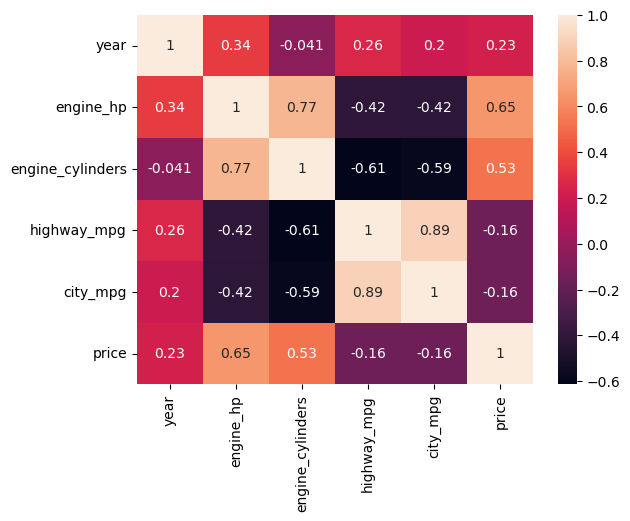

In [12]:
sn.heatmap(corr_matrix, annot=True)
plt.show()

## Validation Framework

In [13]:
data.price.mean()

40594.737032063116

In [14]:
data_copy = data.copy(deep=True)
data['above_average'] = (data.price > data.price.mean()).astype(int)
del data['price']
data.head()

C:\Users\desol\AppData\Local\Temp\ipykernel_15380\2817254612.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['above_average'] = (data.price > data.price.mean()).astype(int)


,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,above_average
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,1
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,1
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,0
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,0
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,0


In [15]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(data, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [16]:
len(df_train), len(df_val), len(df_test)

(7148, 2383, 2383)

In [17]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [18]:
y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

In [19]:
del df_train['above_average']
del df_val['above_average']
del df_test['above_average']

## Feature Importance

### Question 3

In [20]:
df_full_train = df_full_train.reset_index(drop=True)
df_full_train.dtypes

make                  object
model                 object
year                   int64
engine_hp            float64
engine_cylinders     float64
transmission_type     object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
above_average          int32
dtype: object

In [21]:
categorical = [
    'make',
    'model',
    'transmission_type',
    'vehicle_style'
]

In [22]:
from sklearn.metrics import mutual_info_score

def mutual_info_churn_score(series):
    return round(mutual_info_score(series, df_full_train.above_average), 2)

In [23]:
mi = df_full_train[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending=False)

model                0.46
make                 0.24
vehicle_style        0.08
transmission_type    0.02
dtype: float64

## Logistic Regression

### Question 4

In [24]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [25]:
dv = DictVectorizer(sparse=False)

train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)
val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

In [26]:
model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear')

In [27]:
model.intercept_[0]

-0.36455285567708545

In [28]:
model.coef_[0].round(2)

array([ 0.08, -0.13,  0.04, -0.  ,  1.3 ,  1.82,  0.6 ,  2.85,  2.15,
        0.18,  0.  , -0.49,  2.11, -1.27, -1.35, -3.89, -0.52,  0.38,
       -1.86, -0.73,  0.63, -0.25, -1.27, -2.7 ,  0.37, -1.48,  0.01,
        1.92,  1.24,  1.18,  4.05,  1.07,  0.  , -1.67,  0.  ,  0.85,
       -2.03, -0.87, -1.45, -0.37, -3.22,  2.02,  0.99,  0.89, -0.24,
        0.34, -2.74, -1.94,  3.26, -0.97, -0.56,  1.32, -1.39, -0.41,
       -0.05, -0.01, -0.  , -1.23, -0.93, -0.  , -0.  , -0.  , -0.19,
       -0.02,  1.7 ,  0.45, -0.47, -0.07, -0.17, -0.17, -0.  , -0.02,
       -1.01,  0.16,  0.02,  1.5 ,  0.86, -0.63, -0.08,  0.1 ,  0.  ,
        1.82,  0.38, -0.03,  1.25,  0.94, -0.05, -2.58, -0.05, -0.29,
       -0.08,  0.03, -0.27,  0.  ,  0.  ,  0.03,  0.  , -0.11,  0.45,
        0.18, -2.55, -0.  ,  0.  ,  0.  , -0.01,  0.2 , -0.05, -0.01,
       -0.03, -1.58, -0.06, -1.08, -0.16,  0.93,  0.76, -1.01,  0.49,
        0.32, -0.24, -0.34, -0.1 ,  0.83, -0.43, -0.01, -0.14, -0.48,
       -0.09, -0.86,

In [29]:
y_pred = model.predict_proba(X_val)[:, 1]
above_average = (y_pred >= 0.5)
accuracy = (y_val == above_average).mean()
round(accuracy, 2)

0.95

### Question 5

In [30]:
model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_val)[:, 1]
above_average = (y_pred >= 0.5)
original_accuracy = (y_val == above_average).mean()
original_accuracy

0.9458665547629039

In [31]:
features = [*df_train.columns]

for f in features:
    df_train_copy = df_train.drop(columns=[f])
    df_val_copy = df_val.drop(columns=[f])

    dv = DictVectorizer(sparse=False)
    train_dict = df_train_copy.to_dict(orient='records')
    X_train = dv.fit_transform(train_dict)
    val_dict = df_val_copy.to_dict(orient='records')
    X_val = dv.transform(val_dict)

    model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_val)[:, 1]
    above_average = (y_pred >= 0.5)
    accuracy = (y_val == above_average).mean()
    diff = accuracy - original_accuracy
    
    print(f'The difference in accuracy without {f} is {diff:.4f}')

The difference in accuracy without make is 0.0004
The difference in accuracy without model is -0.0264
The difference in accuracy without year is 0.0021
The difference in accuracy without engine_hp is -0.0222
The difference in accuracy without engine_cylinders is 0.0013
The difference in accuracy without transmission_type is -0.0008
The difference in accuracy without vehicle_style is -0.0034
The difference in accuracy without highway_mpg is -0.0038
The difference in accuracy without city_mpg is 0.0004


## Linear Regression with Scikit-Learn

### Question 6

In [32]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

data_copy.price = np.log1p(data_copy.price)

df_full_train, df_test = train_test_split(data_copy, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.price.values
y_val = df_val.price.values
y_test = df_test.price.values

del df_train['price']
del df_val['price']
del df_test['price']

dv = DictVectorizer(sparse=False)
train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)
val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

alpha = [0, 0.01, 0.1, 1, 10]
for a in alpha:
    model = Ridge(solver='sag', random_state=42, alpha=a)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    score = round(mean_squared_error(y_val, y_pred), 3)
    print(f'For alpha {a} RMSE is {score}')


For alpha 0 RMSE is 0.244
For alpha 0.01 RMSE is 0.244
For alpha 0.1 RMSE is 0.244
For alpha 1 RMSE is 0.244
For alpha 10 RMSE is 0.244
